<div class="mark">
 Bike Sharing Linear Regression Assignment</div><i class="fa fa-lightbulb-o "></i>

##  Loading and Understanding Data

Importing libraries -

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Read the csv file using pandas -


In [2]:
bike = pd.read_csv('day.csv')

 Check the head and tail of the dataset-


In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729






The descriptive information-

In [5]:
#The shape of dataframe-
bike.shape

(730, 16)

In [6]:
#The data types of data-
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observation-

The dataset has 730 rows and 16 columns.

One column is date type and  all other columns are either float or integer type.

In the dataset there seems to be some fields that are categorical in nature but are in integer/float type. So that needs to be checked.

## DATA QUALITY CHECK

Here the target variable(dependent) is cnt and all others are predictor(independent variables)

Check for the NULL/MISSING values-

In [9]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observation-

There are no missing / Null values either in the dataset.

Duplicate Check-

In [10]:
bike_duplicate = bike.copy()

bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_duplicate.shape

(730, 16)

In [12]:
bike.shape

(730, 16)

Observation-

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

Data Cleaning-

After reading the data and the data dictionary, the following variables can be removed from further analysis:

instant : It is an index value.

dteday : This has the date.As we already have seperate columns for 'year' & 'month',hence, we could drop this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers which is added in 'cnt'.So we can drop these two.

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
bike.drop(['instant'], axis = 1, inplace = True)

bike.drop(['dteday'], axis = 1, inplace = True)

bike.drop(['casual'], axis = 1, inplace = True)

bike.drop(['registered'], axis = 1, inplace = True)

In [15]:
#Dataframe after dropping

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


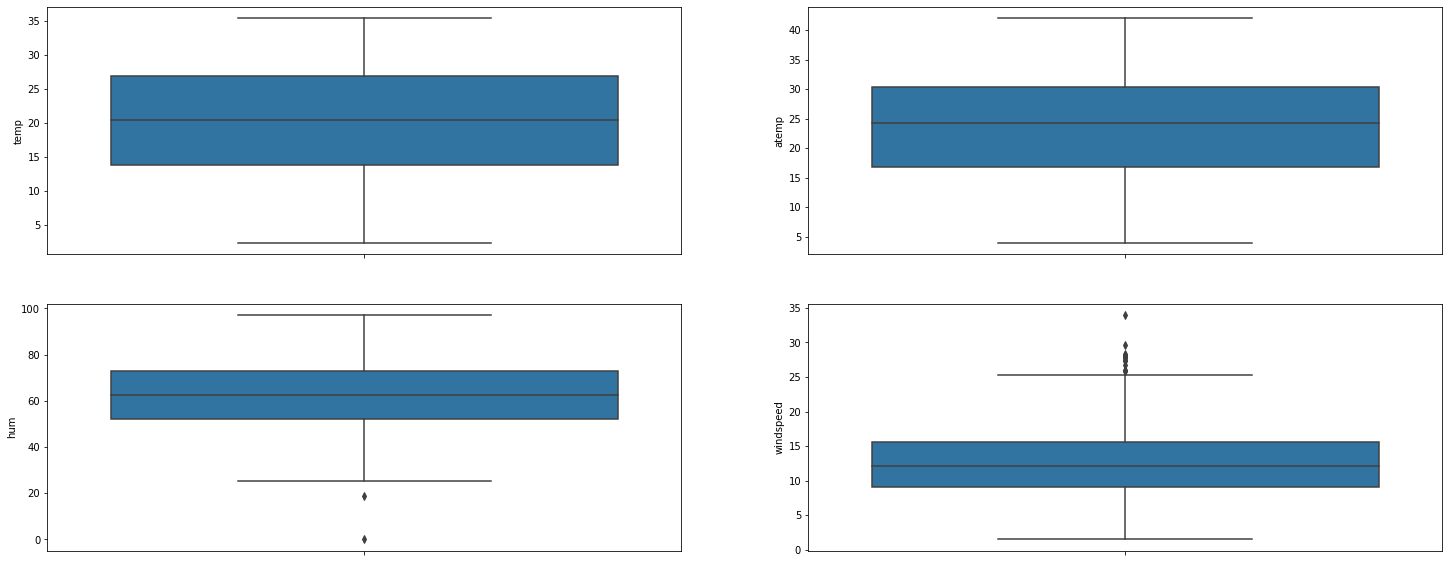

In [16]:
#Handleing Outliers- 

plt.figure(figsize=(25, 10))

plt.subplot(2,2,1)
sns.boxplot( y = 'temp', data = bike)

plt.subplot(2,2,2)
sns.boxplot( y = 'atemp', data = bike)

plt.subplot(2,2,3)
sns.boxplot( y = 'hum', data = bike)

plt.subplot(2,2,4)
sns.boxplot( y = 'windspeed', data = bike)

plt.show()

Observation-

From the above boxplots we infer there are no outliers to be handled. 


## EXPLORATORY DATA ANALYSIS

Visualising Catagorical Variables-

In [17]:
#converting the data to more readable format -
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'clear',2:'mist',3:'light snow/rain',4:'heavy rain'},inplace = True)

bike.mnth=bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday=bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Boxplot for all the categorical variables using the original data bike

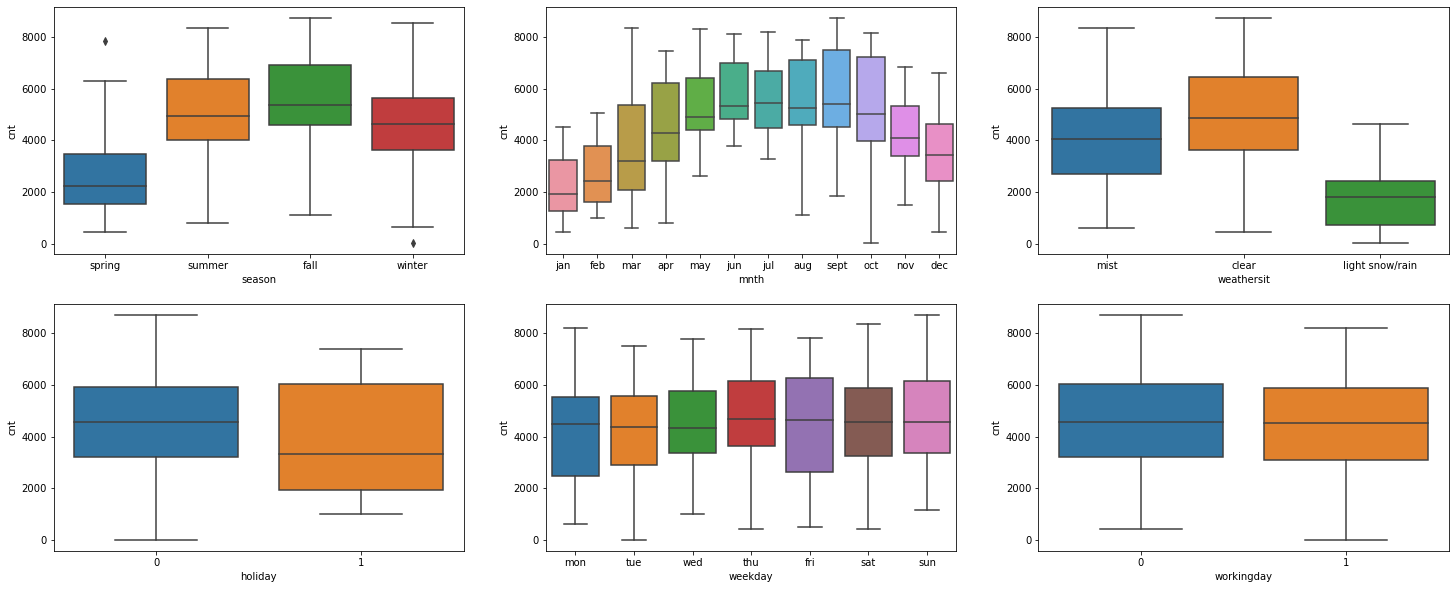

In [18]:
plt.figure(figsize=(25, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.show()

Observation-

6 categorical variables .

season: Almost 32% of the bike booking were happening 'fall' with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter . This indicates, season can be a good predictor for the dependent variable.

mnth: Demand is continuously growing each month till June to September.September  has highest demand. After September, demand is  decreasing with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Maximum of the bike booking were happening during ‘clear' i.e Clear, Few clouds, Partly cloudy, Partly cloudy- with a median of close to 5000 booking (for the period of 2 years). This was followed by light snow/rain . This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday:  this data is clearly biased. This indicates, holiday cannot be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend  having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. It will be decided by the model  if this needs to be added or not.

workingday: workingday needs to be analysed for the dependent variable.


In [19]:
#converting the data to original format -
bike.season.replace({"spring":1,"summer":2,"fall":3,"winter":4},inplace = True)

bike.weathersit.replace({'clear':1,'mist':2,'light snow/rain':3,'heavy rain':4},inplace = True)

bike.mnth=bike.mnth.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sept':9,'oct':10,'nov':11,'dec':12})

bike.weekday=bike.weekday.replace({'sun':0,'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Visualizing numerical variables-

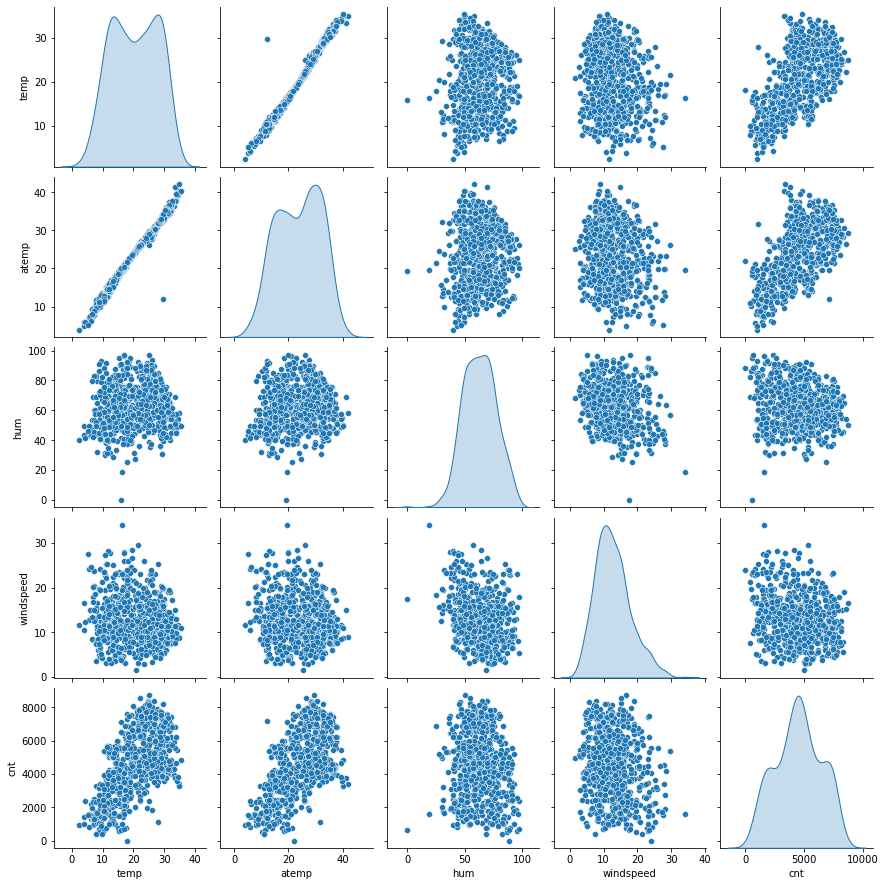

In [20]:
# A new dataframe for storing all the numeric variables-

bike_numerical=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numerical, diag_kind='kde')
plt.show()

Observation-

atemp ,temp and cnt has linear relation.

Correlation Matrix

In [21]:
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


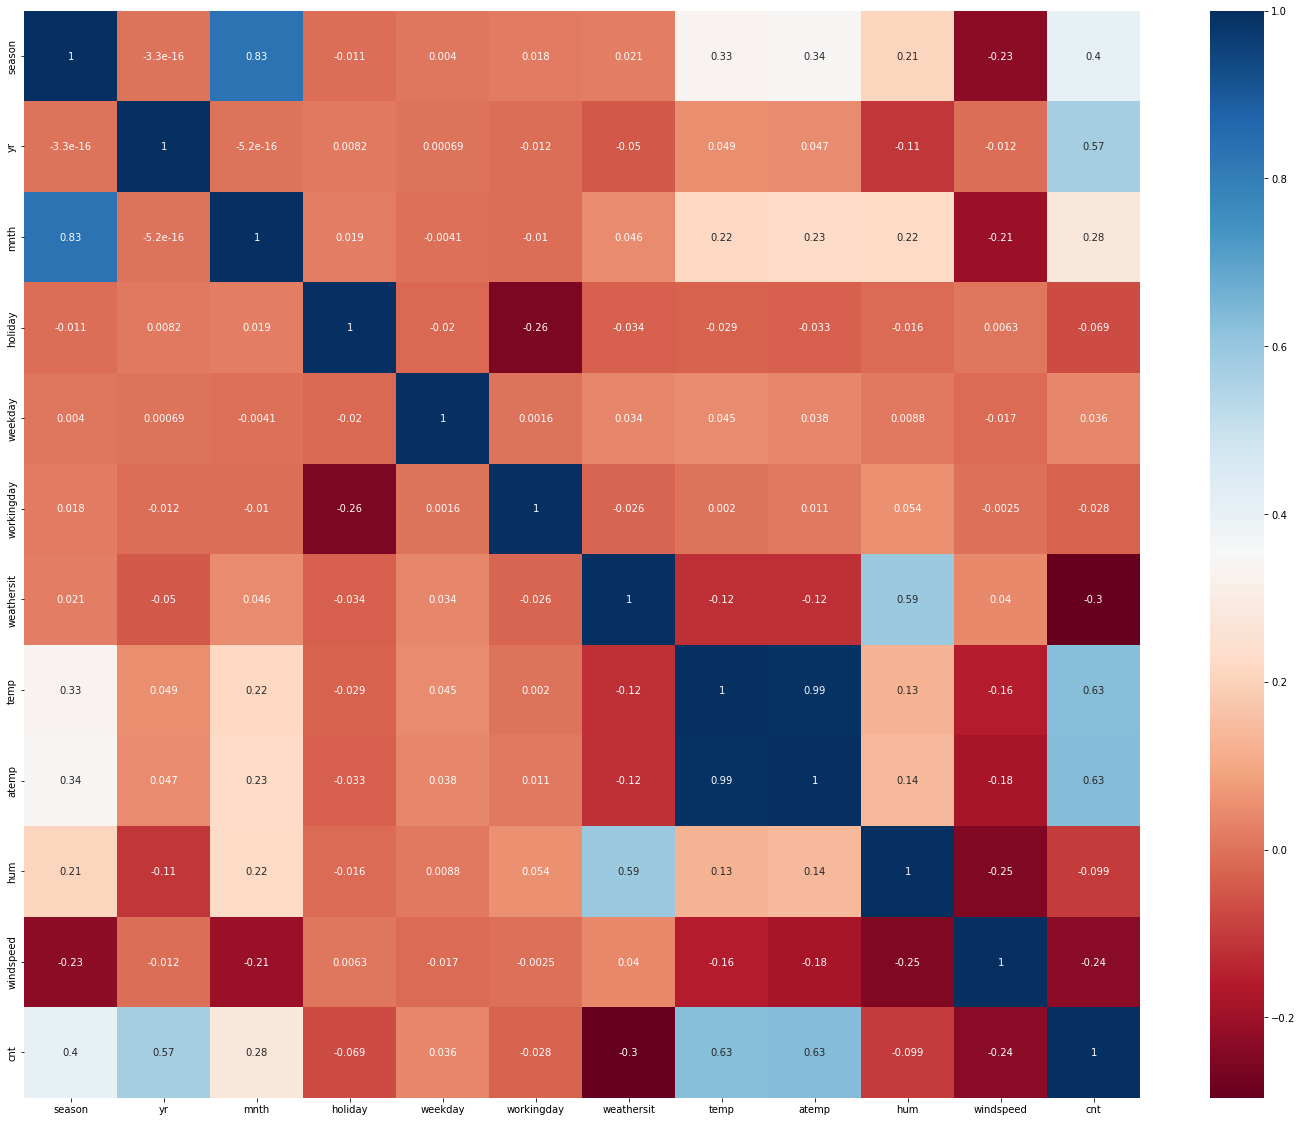

In [22]:
plt.figure(figsize = (25,20))

sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()

Observation-

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

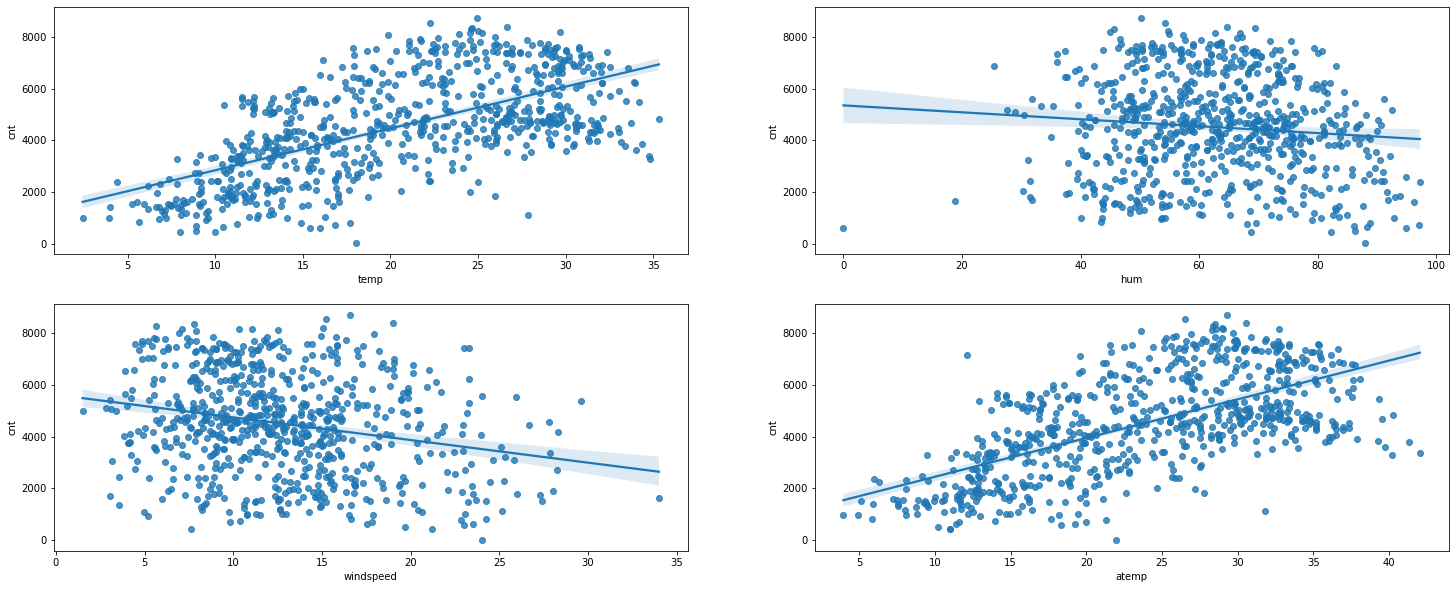

In [23]:
#visualising numerical variables-
plt.figure(figsize=(25, 10))

plt.subplot(2,2,1)
sns.regplot(x = 'temp', y = 'cnt', data = bike)

plt.subplot(2,2,2)
sns.regplot(x = 'hum', y = 'cnt', data = bike)

plt.subplot(2,2,3)
sns.regplot(x = 'windspeed', y = 'cnt', data = bike)

plt.subplot(2,2,4)
sns.regplot(x = 'atemp', y = 'cnt', data = bike)

plt.show()

Observation-

temp and atemp has similar relationship with cnt.So atemp can be dropped.

cnt is linearly increasing with temp indicating linear relation.

cnt decreasing with increase in humidity.

cnt decreasing with increase in windspeed.

## Creating Dummy Variables

There are four categorical variables- 'mnth', 'weekday', 'season' & 'weathersit' for which we will create dummy variables.

Before creating dummy variables, we will have to convert them into 'object' data types as they are categorical variables but not in correct data type.

In [24]:
bike['season']=bike['season'].astype('object')
bike['weathersit']=bike['weathersit'].astype('object')
bike['mnth']=bike['mnth'].astype('object')
bike['weekday']=bike['weekday'].astype('object')

In [25]:
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

 This code does 3 things:
1) Create Dummy variable

2) Drop original variable for which the dummy was created

3) Drop first dummy variable for each set of dummies created.



In [26]:
bike = pd.get_dummies(bike, drop_first=True)

In [27]:
bike.shape

(730, 30)

In [28]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## SPLITTING THE DATA

Spliting the data into TRAIN and TEST (70:30 ratio).

Useing train_test_split method from sklearn package for this.

In [29]:
# shape before spliting

bike.shape

(730, 30)

In [30]:
# Info before spliting

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [31]:
# specify random_state so that the train and test data set will always have the same rows.

from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [32]:
# the info and shape of the dataframes after split:

print(df_train.info())

print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [33]:
#test info-
print(df_test.info())

print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

## RESCALING THE FEATURES

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# values before scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Applying scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
# Checking values after scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')

X_train = df_train

Recursive feature elimination RFE

In [42]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 5),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 10),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 9),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

Model 1

In [47]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,390.75
3,atemp,367.17
1,workingday,34.45
4,hum,17.66
17,weekday_5,8.61
13,weekday_1,8.60
14,weekday_2,8.38
16,weekday_4,8.22
7,season_3,7.46
15,weekday_3,7.06


In [48]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [49]:
# Check the parameters obtained

lr1.params

const           0.247436
yr              0.229339
workingday      0.044359
temp            0.378874
atemp           0.096452
hum            -0.174800
windspeed      -0.176186
season_2        0.125561
season_3        0.090546
season_4        0.154497
mnth_3          0.048630
mnth_5          0.025527
mnth_9          0.099542
mnth_10         0.057685
weekday_1      -0.075407
weekday_2      -0.085877
weekday_3      -0.064681
weekday_4      -0.047878
weekday_5      -0.050930
weathersit_2   -0.047939
weathersit_3   -0.273253
dtype: float64

In [50]:
# Print a summary of the linear regression model obtained

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 08 May 2022   Prob (F-statistic):          9.39e-182
Time:                        11:11:45   Log-Likelihood:                 510.81
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     489   BIC:                            -890.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2474      0.029      8.602   

Model 2

Removing the variable 'atemp' based on its High p-value & High VIF

In [51]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.41
2,temp,24.09
3,hum,17.45
16,weekday_5,8.61
12,weekday_1,8.60
13,weekday_2,8.38
15,weekday_4,8.22
6,season_3,7.36
14,weekday_3,7.06
4,windspeed,4.57


In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [54]:
lr2.params

const           0.248566
yr              0.229338
workingday      0.045014
temp            0.470230
hum            -0.173973
windspeed      -0.180029
season_2        0.125861
season_3        0.088864
season_4        0.154897
mnth_3          0.048822
mnth_5          0.025098
mnth_9          0.099568
mnth_10         0.057801
weekday_1      -0.075426
weekday_2      -0.085927
weekday_3      -0.064966
weekday_4      -0.048149
weekday_5      -0.051032
weathersit_2   -0.048145
weathersit_3   -0.273841
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.00e-182
Time:                        11:11:58   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     490   BIC:                            -896.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2486      0.029      8.659   

Model 3

Removing the variable 'hum' based on its Very High 'VIF' value.

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [56]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.40
2,temp,17.56
15,weekday_5,8.57
11,weekday_1,8.50
12,weekday_2,8.32
14,weekday_4,8.16
5,season_3,7.12
13,weekday_3,7.01
3,windspeed,4.21
4,season_2,3.78


In [58]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [59]:
lr3.params

const           0.150360
yr              0.233422
workingday      0.043378
temp            0.442700
windspeed      -0.144201
season_2        0.129940
season_3        0.095333
season_4        0.150385
mnth_3          0.054748
mnth_5          0.013983
mnth_9          0.090994
mnth_10         0.055955
weekday_1      -0.079771
weekday_2      -0.089499
weekday_3      -0.067651
weekday_4      -0.048653
weekday_5      -0.052946
weathersit_2   -0.077035
weathersit_3   -0.325856
dtype: float64

In [60]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.27e-179
Time:                        11:12:03   Log-Likelihood:                 499.86
No. Observations:                 510   AIC:                            -961.7
Df Residuals:                     491   BIC:                            -881.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1504      0.019      7.721   

Model 4

Removing the variable 'season3' based on its Very High 'VIF' value.
Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [61]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.34
14,weekday_5,8.52
10,weekday_1,8.48
11,weekday_2,8.30
13,weekday_4,8.11
12,weekday_3,6.98
2,temp,4.72
3,windspeed,4.02
4,season_2,2.17
0,yr,2.02


In [63]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [64]:
lr4.params

const           0.134782
yr              0.231617
workingday      0.049013
temp            0.565604
windspeed      -0.151813
season_2        0.083855
season_4        0.117052
mnth_3          0.040628
mnth_5         -0.003293
mnth_9          0.102651
mnth_10         0.043475
weekday_1      -0.083377
weekday_2      -0.094003
weekday_3      -0.073075
weekday_4      -0.056220
weekday_5      -0.060990
weathersit_2   -0.077143
weathersit_3   -0.318093
dtype: float64

In [65]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.31e-176
Time:                        11:12:08   Log-Likelihood:                 490.02
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     492   BIC:                            -867.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1348      0.020      6.911   

Model 5

Removing the variable 'mnth_10' based on its Very High p-value.

In [66]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.31
13,weekday_5,8.52
9,weekday_1,8.48
10,weekday_2,8.29
12,weekday_4,8.11
11,weekday_3,6.98
2,temp,4.60
3,windspeed,3.98
4,season_2,2.17
0,yr,2.01


In [68]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [69]:
lr5.params

const           0.132412
yr              0.230343
workingday      0.046867
temp            0.573104
windspeed      -0.154763
season_2        0.083003
season_4        0.132623
mnth_3          0.041204
mnth_5         -0.004216
mnth_9          0.096119
weekday_1      -0.082177
weekday_2      -0.091451
weekday_3      -0.071065
weekday_4      -0.053626
weekday_5      -0.059327
weathersit_2   -0.075442
weathersit_3   -0.312400
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.95e-176
Time:                        11:12:13   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -940.3
Df Residuals:                     493   BIC:                            -868.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1324      0.020      6.767   

Model 6

Removing the variable 'mnth_3' based on its High 'p-value'

In [71]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.26
12,weekday_5,8.52
8,weekday_1,8.47
9,weekday_2,8.29
11,weekday_4,8.11
10,weekday_3,6.97
2,temp,4.57
3,windspeed,3.88
4,season_2,2.15
0,yr,2.00


In [73]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [74]:
lr6.params

const           0.142860
yr              0.230955
workingday      0.049422
temp            0.562763
windspeed      -0.154912
season_2        0.085094
season_4        0.127028
mnth_5         -0.009667
mnth_9          0.094296
weekday_1      -0.086875
weekday_2      -0.094467
weekday_3      -0.074635
weekday_4      -0.056863
weekday_5      -0.062615
weathersit_2   -0.074610
weathersit_3   -0.308846
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          5.10e-176
Time:                        11:12:18   Log-Likelihood:                 483.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     494   BIC:                            -868.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1429      0.019      7.434   

Model 7

Dropping mnth_5 as it has very high p value

In [76]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.26
11,weekday_5,8.51
7,weekday_1,8.47
8,weekday_2,8.29
10,weekday_4,8.10
9,weekday_3,6.97
2,temp,4.48
3,windspeed,3.81
0,yr,2.00
4,season_2,1.56


In [78]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [79]:
lr7.params

const           0.143002
yr              0.230955
workingday      0.049552
temp            0.561533
windspeed      -0.153443
season_2        0.081546
season_4        0.126975
mnth_9          0.094572
weekday_1      -0.087015
weekday_2      -0.094648
weekday_3      -0.074814
weekday_4      -0.057094
weekday_5      -0.062531
weathersit_2   -0.074677
weathersit_3   -0.308276
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.49e-177
Time:                        11:12:25   Log-Likelihood:                 483.78
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     495   BIC:                            -874.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1430      0.019      7.448   

Model 8

Dropping weekday_4 as it has high p value

In [81]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,5.81
2,temp,4.43
3,windspeed,3.80
0,yr,1.99
7,weekday_1,1.94
10,weekday_5,1.94
8,weekday_2,1.91
9,weekday_3,1.75
4,season_2,1.56
11,weathersit_2,1.49


In [83]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [84]:
lr8.params

const           0.139004
yr              0.230029
workingday      0.002305
temp            0.561418
windspeed      -0.151684
season_2        0.082187
season_4        0.127002
mnth_9          0.096313
weekday_1      -0.036387
weekday_2      -0.046417
weekday_3      -0.027653
weekday_5      -0.012624
weathersit_2   -0.074093
weathersit_3   -0.308071
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.54e-177
Time:                        11:12:32   Log-Likelihood:                 482.18
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     496   BIC:                            -877.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1390      0.019      7.275   

Model 9

Dropping weekday_5 as it has high p value

In [86]:
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.43
1,workingday,3.99
3,windspeed,3.78
0,yr,1.98
4,season_2,1.56
7,weekday_1,1.49
10,weathersit_2,1.49
8,weekday_2,1.48
9,weekday_3,1.40
5,season_4,1.37


In [88]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_new)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [89]:
lr9.params

const           0.139543
yr              0.230306
workingday     -0.003419
temp            0.560655
windspeed      -0.153222
season_2        0.082195
season_4        0.126796
mnth_9          0.095909
weekday_1      -0.030262
weekday_2      -0.040567
weekday_3      -0.021962
weathersit_2   -0.074231
weathersit_3   -0.308808
dtype: float64

In [90]:
# Print a summary of the linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.52e-178
Time:                        11:12:38   Log-Likelihood:                 481.83
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     497   BIC:                            -882.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1395      0.019      7.310   

Model 10

Dropping weekday_3 as it has high p value


In [91]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.43
3,windspeed,3.78
1,workingday,3.48
0,yr,1.98
4,season_2,1.56
9,weathersit_2,1.49
5,season_4,1.37
7,weekday_1,1.35
8,weekday_2,1.34
6,mnth_9,1.20


In [93]:
X_train_lm10 = sm.add_constant(X_train_new)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

In [94]:
lr10.params

const           0.139247
yr              0.230166
workingday     -0.009142
temp            0.560429
windspeed      -0.153772
season_2        0.081816
season_4        0.125929
mnth_9          0.096116
weekday_1      -0.023739
weekday_2      -0.034244
weathersit_2   -0.074088
weathersit_3   -0.305252
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.62e-179
Time:                        11:12:44   Log-Likelihood:                 480.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     498   BIC:                            -886.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1392      0.019      7.283   

Model 11

Dropping weekday_1 as it has high p value

In [96]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.41
3,windspeed,3.77
1,workingday,3.03
0,yr,1.98
4,season_2,1.56
8,weathersit_2,1.49
5,season_4,1.37
7,weekday_2,1.26
6,mnth_9,1.19
9,weathersit_3,1.07


In [98]:
X_train_lm11 = sm.add_constant(X_train_new)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm11).fit()

In [99]:
lr11.params

const           0.137889
yr              0.230286
workingday     -0.015137
temp            0.562919
windspeed      -0.154296
season_2        0.081701
season_4        0.125828
mnth_9          0.095690
weekday_2      -0.028433
weathersit_2   -0.073878
weathersit_3   -0.304753
dtype: float64

In [100]:
# Print a summary of the linear regression model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.22e-179
Time:                        11:12:49   Log-Likelihood:                 478.83
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     499   BIC:                            -889.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1379      0.019      7.201   

Model 12


Drop weekday_2 as it has high p value

In [101]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.41
3,windspeed,3.77
1,workingday,2.85
0,yr,1.98
4,season_2,1.56
7,weathersit_2,1.49
5,season_4,1.36
6,mnth_9,1.19
8,weathersit_3,1.07


In [103]:
X_train_lm12 = sm.add_constant(X_train_new)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_lm12).fit()

In [104]:
lr12.params

const           0.139021
yr              0.229950
workingday     -0.020464
temp            0.561844
windspeed      -0.156166
season_2        0.081241
season_4        0.124712
mnth_9          0.095952
weathersit_2   -0.074157
weathersit_3   -0.302423
dtype: float64

In [105]:
# Print a summary of the linear regression model obtained
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.13e-179
Time:                        11:13:01   Log-Likelihood:                 476.04
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     500   BIC:                            -889.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1390      0.019      7.230   

Model 13

Drop workingday as it has high p value

In [106]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.56
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


In [108]:
X_train_lm13 = sm.add_constant(X_train_new)

# Create a first fitted model
lr13 = sm.OLS(y_train, X_train_lm13).fit()

In [109]:
lr13.params

const           0.123599
yr              0.230940
temp            0.561392
windspeed      -0.155752
season_2        0.081982
season_4        0.126165
mnth_9          0.096124
weathersit_2   -0.073252
weathersit_3   -0.302187
dtype: float64

In [110]:
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.32e-180
Time:                        11:13:07   Log-Likelihood:                 473.56
No. Observations:                 510   AIC:                            -929.1
Df Residuals:                     501   BIC:                            -891.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1236      0.018      6.872   

Observation-

This model looks good, as there seems to be very low multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

lr13 model coefficient values

const        :    0.1236

yr           :    0.2309

temp          :   0.5614

windspeed      : -0.1558

season_2      :   0.0820

season_4      :   0.1262

mnth_9         :  0.0961

weathersit_2   : -0.0733

weathersit_3  :  -0.3022

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
    
H1: at least one Bi!=0
 
Observation-

From the lr13 model summary, it is evident that all the coefficients are not equal to  zero which  means We reject the null hypothesis.

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

 F-statistic:281.3
 
 Prob (F-statistic):7.32e-180
 
The F-Statistics value of 281.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

The equation of best fitted surface based on model lr13:

cnt = 0.1236 +(yr * 0.2309) +(temp * 0.5614) - (windspeed * 0.1558) + (season_2 * 0.0820 ) + (season_4 * 0.1262 ) + (mnth_9 * 0.0961 ) - (weathersit_2  * 0.0733 ) - (weathersit_3 * 0.3022 )

Interpretation of Coefficients:


const: The Constant value of ‘0.1236’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), the bike rental can still increase by 0.1236 units.

yr: A coefficient value of ‘0.2309’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2309 units.

temp: A coefficient value of ‘0.5614’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5614 units.

windspeed: A coefficient value of ‘-0.1558’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.1558 units.

season_2: A coefficient value of ‘0.0820’ indicated that a unit increase in season_2 variable decreases the bike hire numbers by 0.0820 units.

season_4: A coefficient value of ‘0.1262’ indicated that  a unit increase in season_4 variable increases the bike hire numbers by 0.1262 units.

mnth_9: A coefficient value of ‘0.0961’ indicated that  a unit increase in mnth_9 variable increases the bike hire numbers by 0.0961 units.

weathersit_2: A coefficient value of ‘-0.0733’ indicated that a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0733 units.

weathersit_3: A coefficient value of ‘-0.3022’ indicated that a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3022 units.



## ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data-

In [111]:
y_train_pred = lr13.predict(X_train_lm13)

Text(0.5, 0, 'Errors')

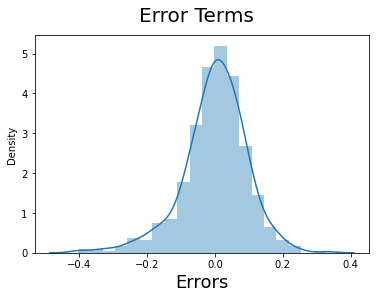

In [112]:
res = y_train-y_train_pred

# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

Observation-

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

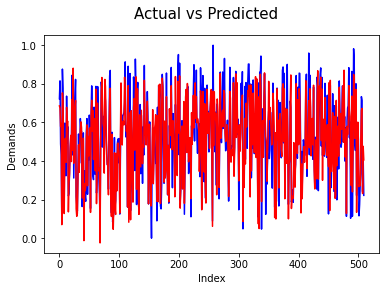

In [113]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Observation-

Actual and Predicted result following almost the same pattern so this model seems ok

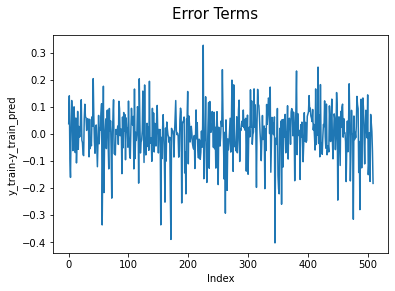

In [114]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Linearity Check

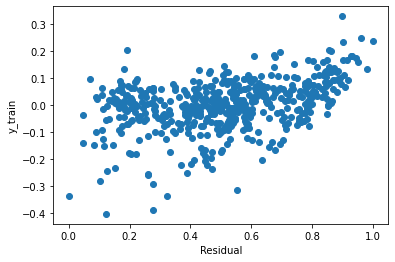

In [115]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

There is No Multicollinearity between the predictor variables -

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.56
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


Observation-

From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr13)

Applying the scaling on the test sets

In [117]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [118]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [119]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [120]:
y_test = df_test.pop('cnt')
X_test = df_test

In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [122]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm13 = sm.add_constant(X_test)
X_test_lm13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_2  219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [123]:
# Making predictions using the final model (lr6)

y_pred = lr13.predict(X_test_lm13)

## MODEL EVALUATION

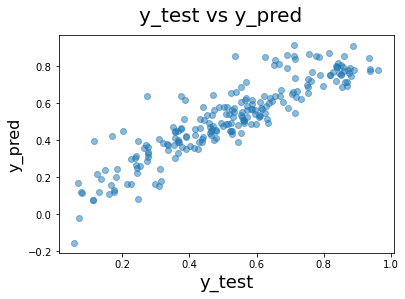

In [124]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [125]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8067023927509687

Adjusted R^2 Value for TEST

In [126]:
r2=0.8067023927509687

In [127]:
# Get the shape of X_test
X_test.shape

(219, 8)

In [128]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.799338674379577

## Final Result Comparison

Train R^2 :0.818

Train Adjusted R^2 :0.815

Test R^2 :0.806

Test Adjusted R^2 :0.799

This seems to be a really good model that can very well 'Generalize' various datasets.

## FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5614’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5614 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3022’ indicated that a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3022 units.

Year (yr) - A coefficient value of ‘0.2309’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2309 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are -

season_4: - A coefficient value of ‘0.1262’ indicated that a unit increase in season_4 variable increases the bike hire numbers by 0.1262 units.

windspeed: - A coefficient value of ‘-0.1558’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.1558 units.

Note-

season_2 - summer

season_4 -winter

mnth_9 - September

weathersit_2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

weathersit_3 -Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The equation of best fitted surface based on model lr13:

cnt = 0.1236 +(yr * 0.2309) +(temp * 0.5614) - (windspeed * 0.1558) + (season_2 * 0.0820 ) + (season_4 * 0.1262 ) + (mnth_9 * 0.0961 ) - (weathersit_2  * 0.0733 ) - (weathersit_3 * 0.3022 )